#Библиотеки Python для DS (семинары)
##Урок 7. Практическая работа. Сравнение работы алгоритмов деревьев решений. Использование ансамблевых алгоритмов
Анализ рынка недвижимости Калифорнии с использованием ансамблевых методов
Цель задания: Использовать набор данных fetch_california_housing для построения и анализа моделей машинного обучения с акцентом на ансамблевые методы.

1. Загрузка и предварительный анализ данных:
    - Загрузите данные из предоставленного файла fetch_california_housing.xlsx.
    - Исследуйте структуру данных, проведите описательный анализ основных статистических показателей.

2. Предобработка данных:
    - Очистите данные от возможных аномалий и пропущенных значений.

3. Построение моделей:
    - Разделите данные на обучающую и тестовую выборки.
    - Постройте и обучите модели RandomForestRegressor и GradientBoostingRegressor.
    - Постарайтесь оптимизировать их гиперпараметры для улучшения результатов на обучающей выборке.

4. Оценка моделей:
    - Оцените качество моделей на тестовой выборке с использованием метрик RMSE (Root Mean Squared Error) и R² (коэффициент детерминации).
    - Сравните результаты моделей, интерпретируйте их.

5. Анализ важности признаков и выводы:
    - Используйте атрибут feature_importances_ для оценки важности признаков в каждой модели.
    - На основе полученных данных сделайте выводы о том, какие признаки наиболее значимы и почему.

6. Дополнительные задачи (для желающих углубить знания):
    - Проведите кросс-валидацию результатов.
    - Исследуйте влияние удаления некоторых признаков на производительность моделей.




###1. Загрузка и предварительный анализ данных:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from scipy import stats

In [2]:
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['target'] = housing_data.target

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
print(df.isnull().sum())
df.info()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.87,1.90,0.50,2.56,3.53,4.74,15.00
HouseAge,20640.0,28.64,12.59,1.00,18.00,29.00,37.00,52.00
AveRooms,20640.0,5.43,2.47,0.85,4.44,5.23,6.05,141.91
AveBedrms,20640.0,1.10,0.47,0.33,1.01,1.05,1.10,34.07
Population,20640.0,1425.48,1132.46,3.00,787.00,1166.00,1725.00,35682.00
AveOccup,20640.0,3.07,10.39,0.69,2.43,2.82,3.28,1243.33
Latitude,20640.0,35.63,2.14,32.54,33.93,34.26,37.71,41.95
Longitude,20640.0,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31
target,20640.0,2.07,1.15,0.15,1.20,1.80,2.65,5.00


**Выводы:**
- Датасет представляет собой таблицу, содержащую 20640 записей.
- В дата сете 9 признаков. Из которых "target" является целевой переменной.
- Данные:
    - MedInc (Median Income): Медианный доход
    - HouseAge (House Age): Возраст домов
    - AveRooms (Average Rooms): Среднее количество комнат
    - AveBedrms (Average Bedrooms): Среднее количество спален
    - Population: Население
    - AveOccup (Average Occupancy): Средняя занятость жилья
    - Latitude: Широта местоположения
    - Longitude: Долгота местоположения
    - target: Целевая переменная, указывающая на стоимость жилья.
-  в данных нет пропущенных значений.

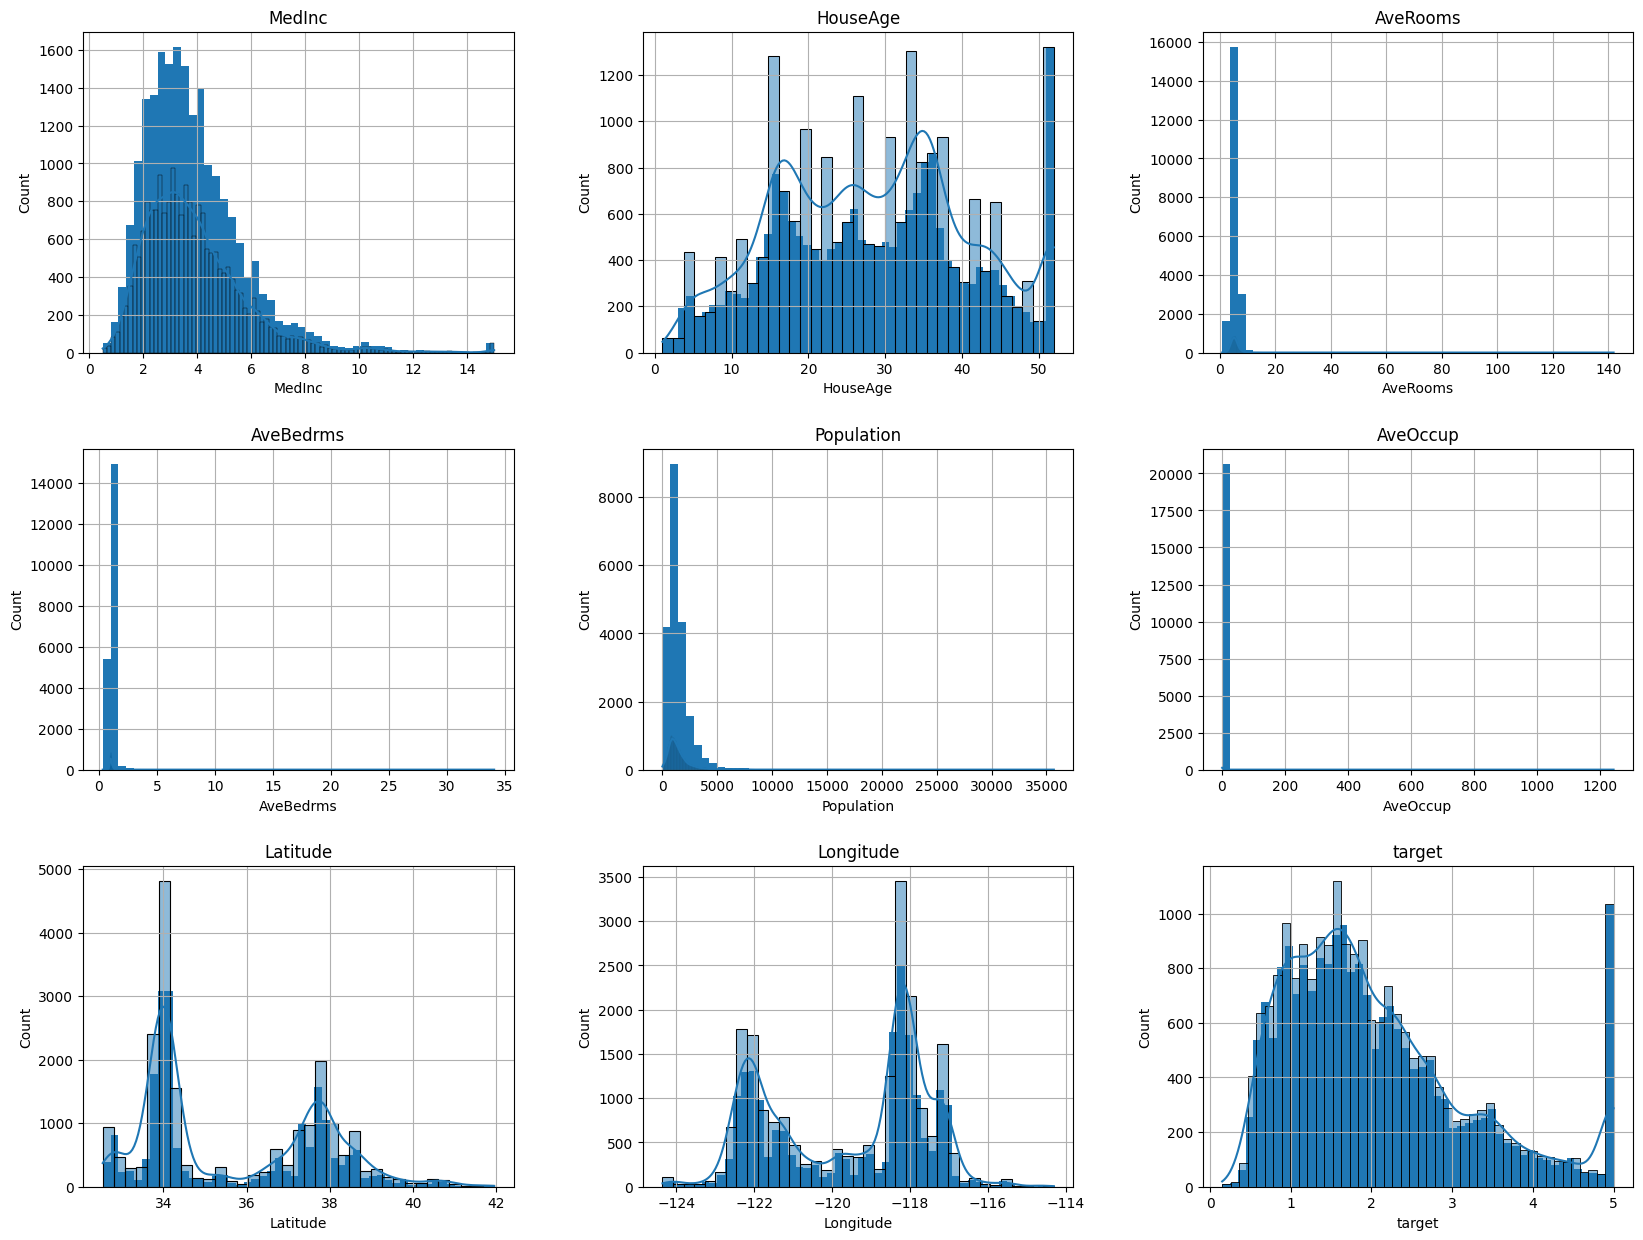

In [6]:
df.hist(bins=50, figsize=(20,15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
plt.show()


- Анализ графиков:
    - AveRooms: Распределение смещено влево. Потребуется обработка выбросов.
    - AveBedrms: Распределение смещено влево. Потребуется обработка выбросов.
    - Population: Распределение смещено влево. Потребуется обработка выбросов.
    - AveOccup: Распределение смещено влево. Потребуется обработка выбросов.




###2. Предобработка данных:

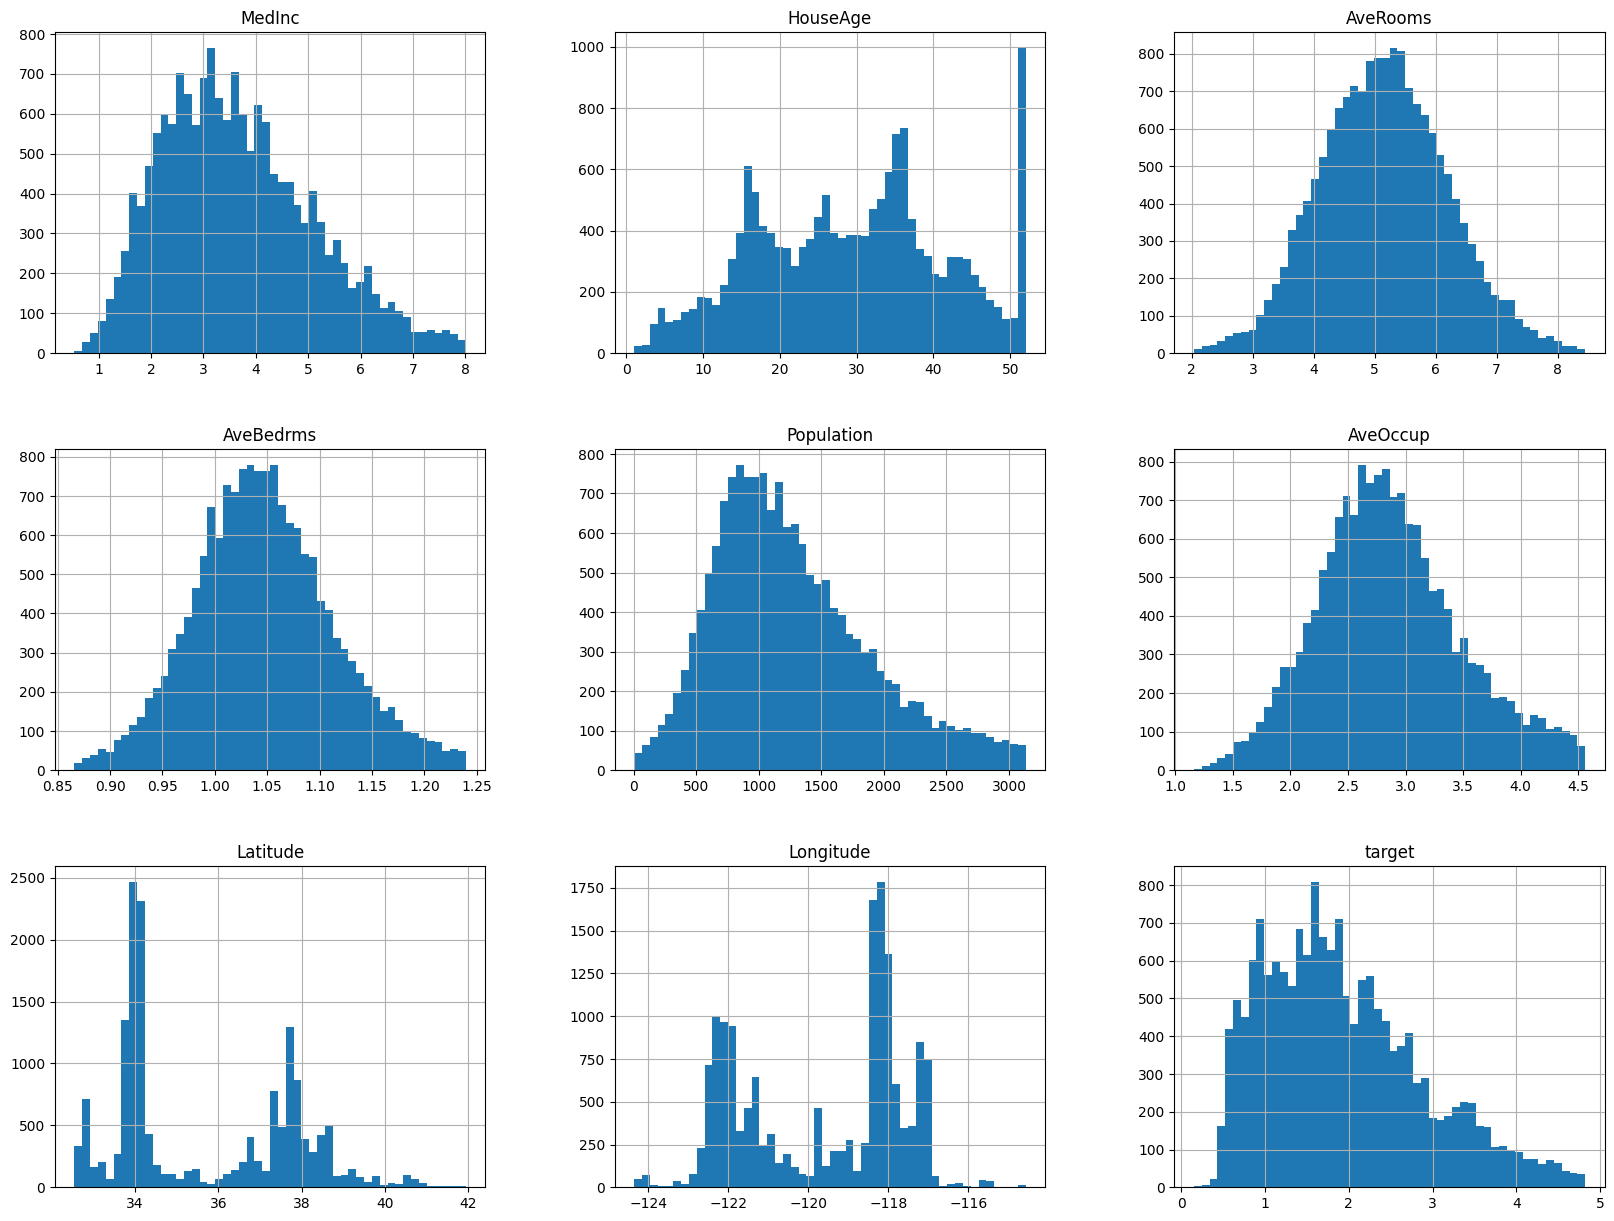

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_no_outliers.hist(bins=50, figsize=(20,15))
plt.show()

###3. Построение моделей:

In [10]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

def train_models(X_train, y_train):
  for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Обучено: {name}")

train_models(X_train, y_train)


Обучено: Random Forest
Обучено: Gradient Boosting


###4. Оценка моделей:

In [17]:
def evaluate_models(models, X_test, y_test):
  for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    print()

evaluate_models(models, X_test, y_test)

Random Forest:
RMSE: 0.505
R²: 0.805

Gradient Boosting:
RMSE: 0.542
R²: 0.776



**выводы:**

- Обе модели показали достаточно хорошие результаты.
- Значения R² выше 0.7 свидетельствуют о том, что обе модели хорошо описывают зависимость между признаками и целевой переменной.
- Random Forest значение RMSE ниже, что означает, что в среднем его предсказания ближе к фактическим значениям стоимости жилья.

###5. Анализ важности признаков и выводы:

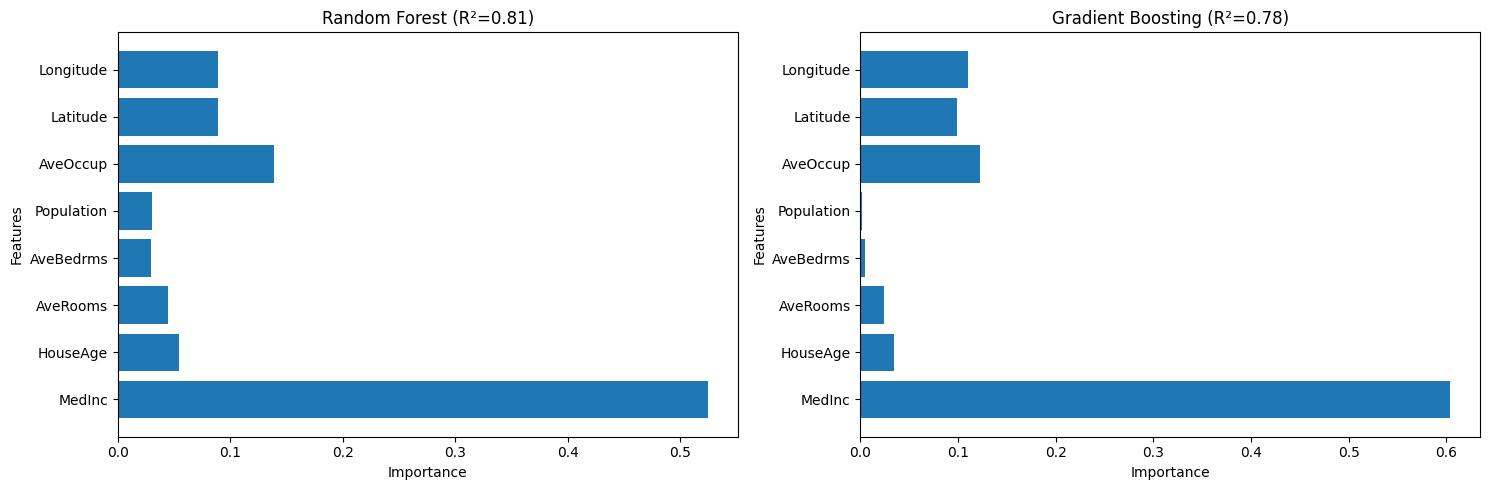

In [13]:
feature_names = X.columns

def analyze_feature_importance(models):
  fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5))

  for ax, (name, model) in zip(axes, models.items()):
    feature_importances = model.feature_importances_
    score = r2_score(y_test, model.predict(X_test))

    ax.barh(np.arange(len(feature_importances)), feature_importances, align='center')
    ax.set_yticks(np.arange(len(feature_importances)))
    ax.set_yticklabels(feature_names)
    ax.set_title(f'{name} (R²={score:.2f})')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')

  plt.tight_layout()
  plt.show()

analyze_feature_importance(models)

feature_importances_rf = models["Random Forest"].feature_importances_
feature_importances_gb = models["Gradient Boosting"].feature_importances_


**Выводы:**
- MedInc является наиболее важным признаком для обеих моделей, что указывает на сильную корреляцию между доходом и стоимостью жилья.
- Longitude и Latitude также играют важную роль, отражая влияние местоположения на цены.
- HouseAge и AveOccup имеют среднюю важность, в то время как остальные признаки менее значимы.
- Gradient Boosting показывает немного лучшую производительность по сравнению с Random Forest.